In [2]:
using DifferentialEquations
using Interact
using Plots
using Combinatorics
using StatsBase
gr()

Plots.GRBackend()

# Code 5.2 Define the levels function (finite-dimension semicircle)

In [23]:

# Theory : Exact Semicircle formula using the Christoffel-Darboux relation

function levels(n)
   # Plot the exact semicircle formula for GUE (Gaussian Unitary Ensemble)
    
   # Parameters
   # n: dimension of matrix for which to determine exact semicircle formula
    stepSize = .001
    length  = 2/stepSize
    x = linspace(-1,1,length)*sqrt.(2*n)*1.3
    pOld = 0*x;      # -1st Hermite Polynomial
    p = 1 + 0*x;     #  0th Hermite polynomial
    k = p;
    for j=1:n
        pNew = (sqrt.(2)*x.*p-sqrt.(j-1)*pOld)/sqrt.(j)
        pOld = p
        p = pNew
    end
    pNew = (sqrt.(2)*x.*p-sqrt.(n)*pOld)/sqrt.(n+1)
    
    k = n*p.^2 - sqrt.(n*(n+1))*pNew.*pOld
    k = k.*exp.(-x.^2)/sqrt.(pi)
    
    # Rescale to fit on [-1,1] and with an area of pi/2
    plot!(x/sqrt.(2*n), k*pi/sqrt.(2*n), linewidth=2, color="blue")
end


levels (generic function with 1 method)

# Code 5.3 An alternative formulation of the levels function

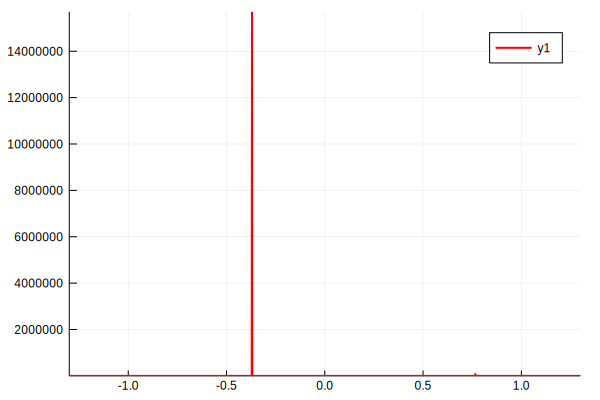

In [190]:
#TODO: Fix this..
# Theory : Exact Semicircle formula using the Tridiagonal matrix

function levels2(n)
   # Plot the exact semicircle formula for GUE (Gaussian Unitary Ensemble)
    
   # Parameters
   # n: dimension of matrix for which to determine exact semicircle formula
    stepSize = .001
    length  = 2/stepSize
    xfull = collect(-1:stepSize:1)*sqrt.(2*n)*1.3

    y = zeros(length+1)
    
    # Form T matrix
    T = diagm(sqrt.(1:n-1),1)
    T = T+T'
    
    # Eigendecomposition of T = UVU'
    F = eig(T)
    V = diagm(F[1])
    U = F[2]
    
    # Precompute U'*e_n
    # tmp_en = U'*((0:n-1)==n-1)
    tmp_en = (U[:,end])'
    
    for i=1:size(xfull)[1]
        x = xfull[i]
        # Generate the v vector
        v = U*inv(V-eye(n)*sqrt.(2)*x)*tmp_en'
        # Multiply by the normalization term
        y[i] = norm((sqrt.(pi))^(-1/2)*exp.(-((x^2)/2))*v/v[1])^2
    end
    # Rescale to fit on [-1,1] and with an area of pi/2
    plot(xfull/sqrt.(2*n), y*pi/sqrt.(2*n), linewidth=2, color="red")
end

levels2(3)


# Code 5.1 Finite Semicircle experiment

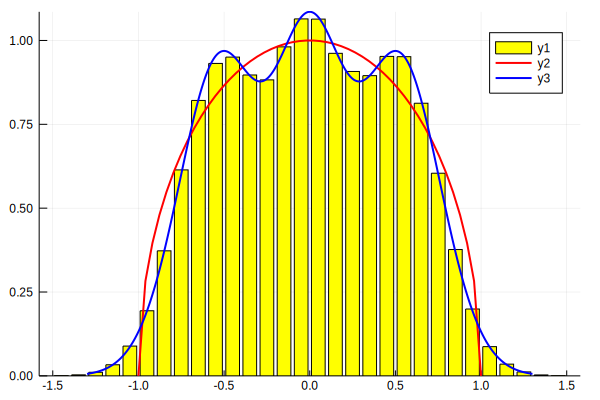

In [131]:

# Experiment : Eigenvalues of a GUE matrices
# Plot : Histogram of the eigenvalues
# Theory : Semicircle and finite semicircle

## Parameters
s =100000 #number of samples
n = 3   #size of matrix
d = 0.1 #bin size
e=[]    #eigenvalue samples

##  Experiment
for i = 1:s
    A = randn(n,n) + 1im*randn(n,n)  # Random complex matrix
    A = (A+A')/(2*sqrt.(4*n))        # Convert to GUE
    e = append!(e,eigvals(A))
    #TODO: Do this with gsvd
end

## Plot
v_hist = fit(Histogram,e,closed=:left,-1.5:d:1.5)
bar(v_hist.edges,v_hist.weights*pi/(2*d*n*s),color="yellow")

## Plot the semicircle
t = linspace(-1,1)
plot!(t,sqrt.(1-t.^2),color="red", linewidth=2)

## Theory
levels(n)